# Evaluation of clustering steps

Here, we evaluate the performance of individual clustering steps in the ClusTCR clustering process.

This notebook can be used to recreate the figures from the manuscript. To use this notebook, navigate to [https://github.com/svalkiers/clusTCR](https://github.com/svalkiers/clusTCR) and clone the repository to your local device. Next, navigate to the folder containing the ClusTCR code and set your working directory to this folder.

In [6]:
import os

# Path to clusTCR repo goes here:
os.chdir('/.../clusTCR/')

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import time

from clustcr import Clustering, datasets

Set plot styling.

In [3]:
plt.style.use(['seaborn-white', 'seaborn-paper'])
plt.rc('font', family='serif')
sns.set_palette('Set1')
sns.set_context('paper', font_scale=1.3)

First, adjust and define the parameters by executing the following code block.

In [12]:
MIN_SAMPLE = 1000
MAX_SAMPLE = 30000
STEP_SIZE = 100

sample_sizes = range(MIN_SAMPLE,
                     MAX_SAMPLE,
                     STEP_SIZE)

Next, execute the following code block to start the analysis.

In [30]:
# Import data set with known antigen specificities
vdjdb_beta = datasets.vdjdb_beta(epitopes=True)

# Initiate output dataframe
output = pd.DataFrame()

# Perform analysis for different sample sizes
for s in sample_sizes:
    
    # Create sample with size s
    sample = vdjdb_beta.sample(s)
    
    # Perform clustering
    faiss = Clustering(method='faiss').fit(sample.CDR3)
    mcl = Clustering(method='mcl').fit(sample.CDR3)
    ts = Clustering().fit(sample.CDR3)
    
    # Evaluate clustering output
    # FAISS
    t0 = time.time()
    faiss_out = faiss.metrics(sample).summary()
    t = time.time() - t0
    faiss_out['method'] = 'Faiss'
    faiss_out['n'] = s
    faiss_out['t'] = t
    output = output.append(faiss_out)
    # MCL
    t0 = time.time()
    mcl_out = mcl.metrics(sample).summary()
    t = time.time() - t0
    mcl_out['method'] = 'MCL'
    mcl_out['n'] = s
    mcl_out['t'] = t
    output = output.append(mcl_out)
    # Two-step (ClusTCR)
    t0 = time.time()
    ts_out = ts.metrics(sample).summary()
    t = time.time() - t0
    ts_out['method'] = 'Two-step'
    ts_out['n'] = s
    ts_out['t'] = t
    output = output.append(ts_out)

# Write output to file
output.to_csv('clustcr_step_evaluation.tsv', sep='\t', index=False)

1000
Total time to run '_twostep': 0.057s
1100
Total time to run '_twostep': 0.112s
1200
Total time to run '_twostep': 0.266s
1300
Total time to run '_twostep': 0.118s
1400
Total time to run '_twostep': 0.130s
1500
Total time to run '_twostep': 0.143s
1600
Total time to run '_twostep': 0.183s
1700
Total time to run '_twostep': 0.155s
1800
Total time to run '_twostep': 0.196s
1900
Total time to run '_twostep': 0.279s
2000
Total time to run '_twostep': 0.187s
2100
Total time to run '_twostep': 0.235s
2200
Total time to run '_twostep': 0.235s
2300
Total time to run '_twostep': 0.210s
2400
Total time to run '_twostep': 0.307s
2500
Total time to run '_twostep': 0.315s
2600
Total time to run '_twostep': 0.233s
2700
Total time to run '_twostep': 0.255s
2800
Total time to run '_twostep': 0.276s
2900
Total time to run '_twostep': 0.264s
3000
Total time to run '_twostep': 0.291s
3100
Total time to run '_twostep': 0.380s
3200
Total time to run '_twostep': 0.338s
3300
Total time to run '_twostep':

Plot results

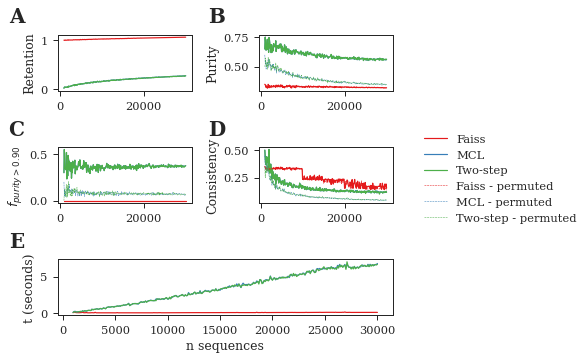

In [32]:
data = output

colors = sns.color_palette('Set1')

retent = data[data['metrics']=='retention']
purity = data[data['metrics']=='purity']
pur_90 = data[data['metrics']=='purity_90']
consist = data[data['metrics']=='consistency']

fig = plt.figure() 

gs = fig.add_gridspec(3,2)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[2,:])

x = data.n.unique()
ax1.plot(x, retent[retent['method']=='Faiss'].actual, color=colors[0], label='Faiss')
ax1.plot(x, retent[retent['method']=='MCL'].actual, color=colors[1], label='MCL')
ax1.plot(x, retent[retent['method']=='Two-step'].actual, color=colors[2], label='Two-step')
ax1.set_ylabel('Retention')

ax2.plot(x, purity[purity['method']=='Faiss'].actual, color=colors[0], label='Faiss')
ax2.plot(x, purity[purity['method']=='MCL'].actual, color=colors[1], label='MCL')
ax2.plot(x, purity[purity['method']=='Two-step'].actual, color=colors[2], label='Two-step')
ax2.plot(x, purity[purity['method']=='Faiss'].baseline, color=colors[0], ls='--', lw=.5, label='Faiss - permuted')
ax2.plot(x, purity[purity['method']=='MCL'].baseline, color=colors[1], ls='--', lw=.5, label='MCL - permuted')
ax2.plot(x, purity[purity['method']=='Two-step'].baseline, color=colors[2], ls='--', lw=.5, label='Two-step - permuted')
ax2.set_ylabel('Purity')

ax3.plot(x, pur_90[pur_90['method']=='Faiss'].actual, color=colors[0], label='Faiss')
ax3.plot(x, pur_90[pur_90['method']=='MCL'].actual, color=colors[1], label='MCL')
ax3.plot(x, pur_90[pur_90['method']=='Two-step'].actual, color=colors[2], label='Two-step')
ax3.plot(x, pur_90[pur_90['method']=='Faiss'].baseline, color=colors[0], ls='--', lw=.5, label='Faiss - permuted')
ax3.plot(x, pur_90[pur_90['method']=='MCL'].baseline, color=colors[1], ls='--', lw=.5, label='MCL - permuted')
ax3.plot(x, pur_90[pur_90['method']=='Two-step'].baseline, color=colors[2], ls='--', lw=.5, label='Two-step - permuted')
ax3.set_ylabel(r'$f_{purity > 0.90}$')

ax4.plot(x, consist[consist['method']=='Faiss'].actual, color=colors[0], label='Faiss')
ax4.plot(x, consist[consist['method']=='MCL'].actual, color=colors[1], label='MCL')
ax4.plot(x, consist[consist['method']=='Two-step'].actual, color=colors[2], label='Two-step')
ax4.plot(x, consist[consist['method']=='Faiss'].baseline, color=colors[0], ls='--', lw=.5, label='Faiss - permuted')
ax4.plot(x, consist[consist['method']=='MCL'].baseline, color=colors[1], ls='--', lw=.5, label='MCL - permuted')
ax4.plot(x, consist[consist['method']=='Two-step'].baseline, color=colors[2], ls='--', lw=.5, label='Two-step - permuted')
ax4.set_ylabel('Consistency')

ax5.plot(x, consist[consist['method']=='Faiss'].t, color=colors[0], label='Faiss')
ax5.plot(x, consist[consist['method']=='MCL'].t, color=colors[1], label='MCL')
ax5.plot(x, consist[consist['method']=='Two-step'].t, color=colors[2], label='Two-step')
ax5.set_ylabel('t (seconds)')
ax5.set_xlabel('n sequences')

fig.subplots_adjust(top=1.1, hspace=1, wspace=.5)

handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, loc='center right',
          bbox_to_anchor=(1.35,0.6))

ax1.text(-0.25, 1.50, 'A', transform=ax1.transAxes,fontsize=20, fontweight='bold', va='top', ha='right')
ax2.text(-0.25, 1.50, 'B', transform=ax2.transAxes,fontsize=20, fontweight='bold', va='top', ha='right')
ax3.text(-0.25, 1.50, 'C', transform=ax3.transAxes,fontsize=20, fontweight='bold', va='top', ha='right')
ax4.text(-0.25, 1.50, 'D', transform=ax4.transAxes,fontsize=20, fontweight='bold', va='top', ha='right')
ax5.text(-0.1, 1.50, 'E', transform=ax5.transAxes,fontsize=20, fontweight='bold', va='top', ha='right')

fig.savefig('./results/figures/clustcr_step_evaluation.eps', format='eps', bbox_inches='tight')